In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_points, plot_decision_boundary

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Input data

In [2]:
X_data = np.array (
    [
        [0, 0, -1],
        [0, 1, -1],
        [1, 0, -1],
        [1, 1, -1]
    ]
)

### Real ouput data

In [3]:
y_nand = np.array([1, 1, 1, 0])
y_nor  = np.array([0, 0, 0, 1])
y_xor  = np.array([0, 1, 1, 0])
y_xnor = np.array([1, 0, 0, 1])

### Function to compute negation of zero class datapoints

In [4]:
def negateZeroClass(X, y):
    X_copy = np.copy(X)
    for i in range(4):
        if y[i] == 0:
            for j in range(3):
                X_copy[i][j] *= -1
    return X_copy

In [5]:
X_nand = negateZeroClass(X_data, y_nand)
X_nor  = negateZeroClass(X_data, y_nor)
X_xor  = negateZeroClass(X_data, y_xor)
X_xnor = negateZeroClass(X_data, y_xnor)

### Function to train the perceptron

In [158]:
def trainPerceptron(X):

    # default value for w: (0, 0, 0)
    w = np.ones((1, 3)).reshape(1, 3)[0]

    # training the perceptron
    passed = False
    it = 0
    while passed == False and it < 1000:
        it += 1
        for i in range(4):
            
            if np.dot(X[i].reshape(1, 3)[0], w) <= 0:
                w = w + X[i].reshape(1, 3)[0]
                i = 0
                
            if i == 3:
                passed = True
    return w

: 

In [159]:
w_nand = trainPerceptron(X_nand)
w_nor = trainPerceptron(X_nor)
w_xor = trainPerceptron(X_xor)
w_xnor = trainPerceptron(X_xnor)

In [160]:
w_nand, w_nor, w_xor, w_xnor

(array([-3., -2., -4.]),
 array([3., 2., 4.]),
 array([0., 1., 0.]),
 array([1., 1., 1.]))

### Plotting the decision boundary

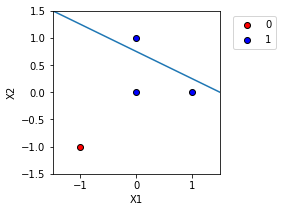

In [161]:
plot_decision_boundary(X_nand[:, :-1], y_nand, w_nand)

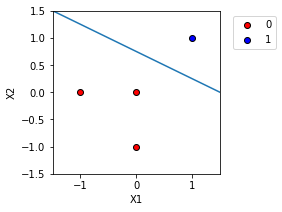

In [162]:
plot_decision_boundary(X_nor[:, :-1], y_nor, w_nor)

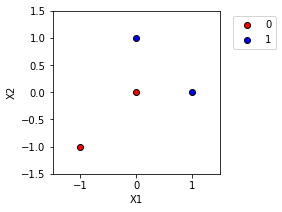

In [163]:
plot_decision_boundary(X_xor[:, :-1], y_xor, w_xor)

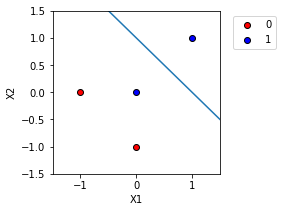

In [164]:
plot_decision_boundary(X_xnor[:, :-1], y_xnor, w_xnor)

### Sigmoid function

In [56]:
def sigmoid (a):
    return 1/(1 + np.exp(-a))

### Perceptron training function with sigmoid

In [165]:
def trainPerceptronWithSigmoid(X, y):

    # default value for w: (0, 0)
    w = np.zeros(2)
    theta = 0
    lr = 0.1

    # training iterations
    for i in range(10):

        output = np.dot(X, w) + theta
        yPred  = sigmoid(output)

        # compute the change in parameters
        dw0    = X.shape[1] * np.sum((y - yPred) * (yPred) * (1 - yPred) * X[:, 0]) 
        dw1    = X.shape[1] * np.sum((y - yPred) * (yPred) * (1 - yPred) * X[:, 1]) 
        dtheta = X.shape[1] * np.sum((y - yPred) * (yPred) * (1 - yPred) * -1)

        # update the parameters
        w[0]   = w[0]  + lr * dw0
        w[1]   = w[1]  + lr * dw1
        theta  = theta + lr * dtheta

    return (w, theta)    

In [166]:
w, theta = trainPerceptronWithSigmoid(X_nand[:, :2], y_nand)
w_nand = np.array([theta, w[0], w[1]])

w, theta = trainPerceptronWithSigmoid(X_nor[:, :2], y_nor)
w_nor = np.array([theta, w[0], w[1]])

w, theta = trainPerceptronWithSigmoid(X_xor[:, :2], y_xor)
w_xor = np.array([theta, w[0], w[1]])

w, theta = trainPerceptronWithSigmoid(X_xnor[:, :2], y_xnor)
w_xnor = np.array([theta, w[0], w[1]])

### Plotting decision boundary

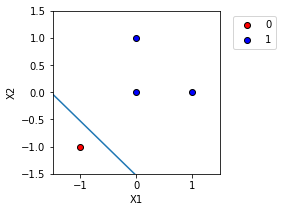

In [167]:
plot_decision_boundary(X_nand[:, :2], y_nand, w_nand)

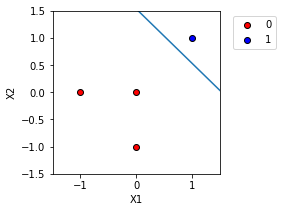

In [168]:
plot_decision_boundary(X_nor[:, :2], y_nor, w_nor)

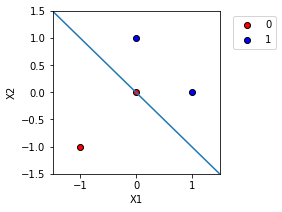

In [169]:
plot_decision_boundary(X_xor[:, :2], y_xor, w_xor)

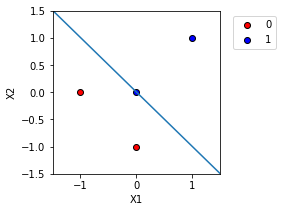

In [170]:
plot_decision_boundary(X_xnor[:, :2], y_xnor, w_xnor)